In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats  #Stats is a scipy module that imports regression analysis functions.
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline 
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
#creating a dataframe of the dataset
df = pd.read_csv('/Users/oma/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
#Check data for null values
df.isnull().any().any()

False

In [4]:
#Checking the data types for each of our variables. 
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
round(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540088.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,3.0,8.0,1788.0,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0
std,2.876566e+09,367127.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,1.0,1.0,828.0,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0
min,1.000102e+06,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


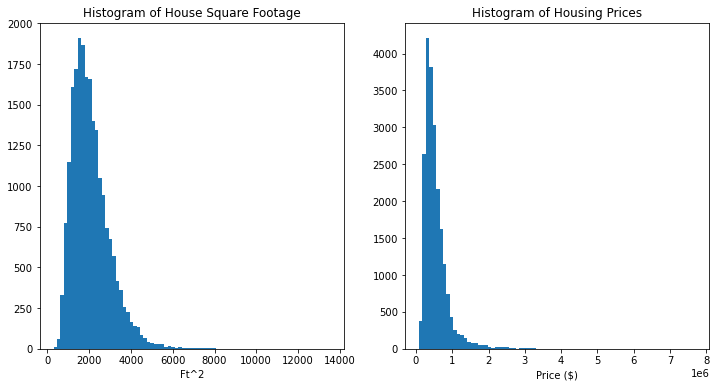

In [12]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram of House Square Footage")

cost.hist(df.price, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram of Housing Prices")

plt.show()

In [13]:
#To use ordinary least square method for linear regression import statsmodels 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
#produce a linear regression summary with OLS - ordinary least squares #2 variables
m = ols('price ~ sqft_living',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:21:35   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

In [15]:
#produce a linear regression summary with OLS - ordinary least squares # multivariate regression
m = ols('price ~ sqft_living + bedrooms + grade + condition',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6749.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:25:52   Log-Likelihood:            -2.9884e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21608   BIC:                         5.977e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.398e+05   1.81e+04    -40.855      

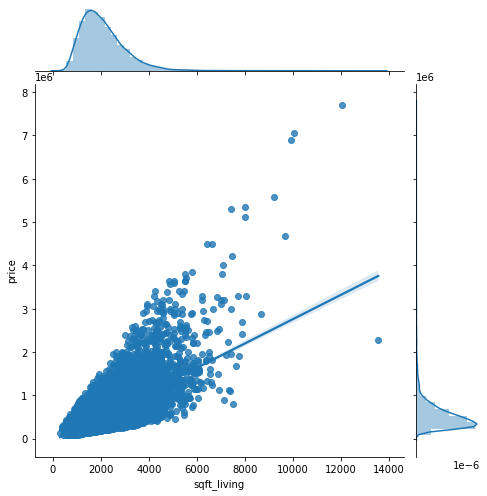

In [17]:
#visualizing the linear regression model
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg',fit_reg= True, height = 7)
plt.show()

In [21]:
#Predicting variable with the model
predicted_data = pd.DataFrame({"price" : df.price, "Predicted_price" : m.fittedvalues})
predicted_data

,price,Predicted_price
0,221900.0,273115.885854
1,538000.0,568217.543470
2,180000.0,131612.227939
3,604000.0,525326.799895
4,510000.0,479405.147442
...,...,...
21608,360000.0,447559.644822
21609,400000.0,567477.956348
21610,402101.0,284825.651826
21611,400000.0,462420.879378
